In [ ]:
#load in the dataset
import pandas as pd

data = pd.read_csv("C:/Users/grace/Downloads/data300/Data300Project.csv")
data.head()

In [105]:
# Strip spaces from the column names to avoid mismatch
data.columns = data.columns.str.strip()

# Re-run the previous steps with updated column names
columns_of_interest = ['Win Pct', 'AP High', 'Fall Enrollment', 'PC in Enrollment']
df = data[columns_of_interest].dropna()


In [82]:
print(df.head())  # View the first few rows
print(df.columns)  # List column names
print(df.info())  # Check non-null counts and data types for all columns

   Win Pct  AP High Fall Enrollment  PC in Enrollment
0    0.846      1.0          38,103             -0.75
1    0.933      1.0          38,392             -0.44
2    0.929      1.0          38,563              2.38
3    0.933      1.0          37,665              1.52
4    0.933      1.0          37,100              2.61
Index(['Win Pct', 'AP High', 'Fall Enrollment', 'PC in Enrollment'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 343
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Win Pct           192 non-null    float64
 1   AP High           192 non-null    float64
 2   Fall Enrollment   192 non-null    object 
 3   PC in Enrollment  192 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB
None


In [83]:
df['Fall Enrollment'] = df['Fall Enrollment'].replace({',': ''}, regex=True)  # Remove commas
df['Fall Enrollment'] = pd.to_numeric(df['Fall Enrollment'], errors='coerce')  # Convert to numeric
#print the data types
print(df.dtypes)
data.head()

Win Pct             float64
AP High             float64
Fall Enrollment       int64
PC in Enrollment    float64
dtype: object


,Team,Year,Conference,Wins,Losses,Ties,Win Pct,Conference Wins,Conference Losses,Conference Ties,Con Pct,Simple Rating,Strength Sched,AP Pre,AP High,AP Post,Fall Enrollment,PC in Enrollment,US College Ranking
0,Alabama Crimson Tide,2019,SEC,11,2,0,0.846,6,2,0,0.750,21.11,2.81,2.0,1.0,8.0,"38,103",-0.75,129.0
1,Alabama Crimson Tide,2018,SEC,14,1,0,0.933,8,0,0,1.000,25.29,6.63,1.0,1.0,2.0,"38,392",-0.44,110.0
2,Alabama Crimson Tide,2017,SEC,13,1,0,0.929,7,1,0,0.875,21.25,5.46,1.0,1.0,1.0,"38,563",2.38,103.0
3,Alabama Crimson Tide,2016,SEC,14,1,0,0.933,8,0,0,1.000,25.62,7.29,1.0,1.0,2.0,"37,665",1.52,96.0
4,Alabama Crimson Tide,2015,SEC,14,1,0,0.933,7,1,0,0.875,23.72,7.46,3.0,1.0,1.0,"37,100",2.61,88.0


In [84]:
print(data.describe())  # Summary stats for numeric columns


              Year        Wins      Losses   Ties     Win Pct  \
count   345.000000  345.000000  345.000000  345.0  345.000000   
mean   2012.000000    7.640580    5.147826    0.0    0.588513   
std       4.326769    3.027698    2.479838    0.0    0.211843   
min    2005.000000    1.000000    0.000000    0.0    0.083000   
25%    2008.000000    5.000000    3.000000    0.0    0.417000   
50%    2012.000000    8.000000    5.000000    0.0    0.615000   
75%    2016.000000   10.000000    7.000000    0.0    0.769000   
max    2019.000000   15.000000   11.000000    0.0    1.000000   

       Conference Wins  Conference Losses  Conference Ties     Con Pct  \
count       345.000000         345.000000            345.0  345.000000   
mean          4.147826           3.979710              0.0    0.509429   
std           2.239615           2.209163              0.0    0.272666   
min           0.000000           0.000000              0.0    0.000000   
25%           2.000000           2.000000   

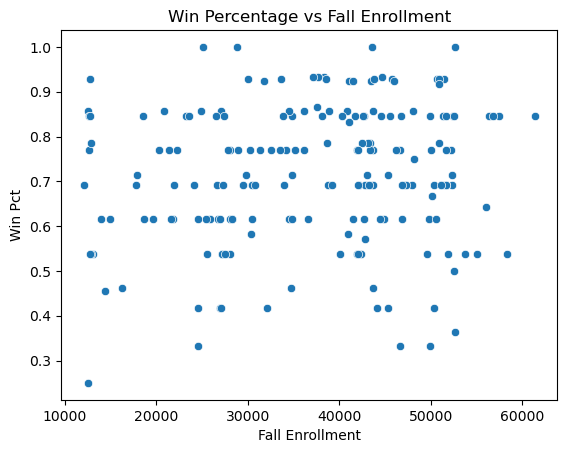

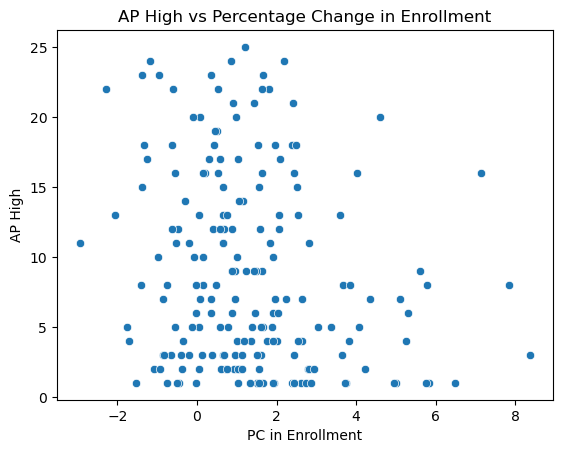

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Win Pct and Fall Enrollment
sns.scatterplot(data=df, x='Fall Enrollment', y='Win Pct')
plt.title('Win Percentage vs Fall Enrollment')
plt.show()

# Scatter plot for AP High and PC in Enrollment
sns.scatterplot(data=df, x='PC in Enrollment', y='AP High')
plt.title('AP High vs Percentage Change in Enrollment')
plt.show()


In [102]:
print(data.corr())

                        Year      Wins    Losses  Ties   Win Pct  \
Year                1.000000  0.035146  0.016108   NaN  0.001911   
Wins                0.035146  1.000000 -0.983562   NaN  0.991938   
Losses              0.016108 -0.983562  1.000000   NaN -0.995790   
Ties                     NaN       NaN       NaN   NaN       NaN   
Win Pct             0.001911  0.991938 -0.995790   NaN  1.000000   
Conference Wins     0.060577  0.935453 -0.928503   NaN  0.933754   
Conference Losses   0.010832 -0.942680  0.938227   NaN -0.942439   
Conference Ties          NaN       NaN       NaN   NaN       NaN   
Con Pct             0.020442  0.942571 -0.937240   NaN  0.941835   
Simple Rating       0.065664  0.923471 -0.920819   NaN  0.923330   
Strength Sched      0.224658  0.163651 -0.147503   NaN  0.143632   
AP Pre             -0.033588 -0.390285  0.393492   NaN -0.381491   
AP High            -0.012648 -0.618429  0.645779   NaN -0.629599   
AP Post            -0.021972 -0.836795  0.865838

C:\Users\grace\AppData\Local\Temp\ipykernel_20596\3359323643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


In [49]:
import statsmodels.api as sm

# Define dependent and independent variables
X = df[['Win Pct', 'AP High']]  # Performance metrics
X = sm.add_constant(X)  # Add constant term for regression
y = df['Fall Enrollment']  # Enrollment size

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Fall Enrollment   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.920
Date:                Wed, 11 Dec 2024   Prob (F-statistic):              0.149
Time:                        22:33:01   Log-Likelihood:                -2076.6
No. Observations:                 192   AIC:                             4159.
Df Residuals:                     189   BIC:                             4169.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.403e+04   6416.602      5.304      0.0

Key Points:
Model Fit:

R-squared: 0.020
Only 2% of the variability in Fall Enrollment is explained by Win Pct and AP High, indicating that these predictors have weak explanatory power for this dataset.
Adj. R-squared: 0.010
Adjusted R-squared adjusts for the number of predictors in the model, confirming the weak fit.
F-statistic: 1.920

Tests whether the predictors are jointly significant.
p-value (Prob F-statistic): 0.149
This indicates the overall model is not statistically significant at typical levels (e.g., 0.05).
Coefficients:

Intercept (const): 3.403e+04
When Win Pct and AP High are zero, the predicted Fall Enrollment is approximately 34,030 students.
Win Pct: 5948.1561
For a 1-unit increase in Win Pct (e.g., moving from 0.500 to 1.500), Fall Enrollment is expected to increase by 5,948 students, holding other factors constant. However, the p-value (0.424) indicates this effect is not statistically significant.
AP High: -142.5650
For a 1-unit increase in AP High (better ranking), Fall Enrollment is expected to decrease by 143 students, but the p-value (0.394) also shows this effect is not significant.
Diagnostics:

Durbin-Watson: 0.335
This suggests potential positive autocorrelation in residuals, which violates a key assumption of OLS.
Omnibus and Jarque-Bera Tests:
These indicate non-normality of residuals, as the p-values are below 0.05.


Understanding the Regression Output
This output summarizes the results of an Ordinary Least Squares (OLS) regression model where the dependent variable (Fall Enrollment) is predicted using the independent variables Win Pct and AP High.

Key Points:
Model Fit:

R-squared: 0.020
Only 2% of the variability in Fall Enrollment is explained by Win Pct and AP High, indicating that these predictors have weak explanatory power for this dataset.
Adj. R-squared: 0.010
Adjusted R-squared adjusts for the number of predictors in the model, confirming the weak fit.
F-statistic: 1.920

Tests whether the predictors are jointly significant.
p-value (Prob F-statistic): 0.149
This indicates the overall model is not statistically significant at typical levels (e.g., 0.05).
Coefficients:

Intercept (const): 3.403e+04
When Win Pct and AP High are zero, the predicted Fall Enrollment is approximately 34,030 students.
Win Pct: 5948.1561
For a 1-unit increase in Win Pct (e.g., moving from 0.500 to 1.500), Fall Enrollment is expected to increase by 5,948 students, holding other factors constant. However, the p-value (0.424) indicates this effect is not statistically significant.
AP High: -142.5650
For a 1-unit increase in AP High (better ranking), Fall Enrollment is expected to decrease by 143 students, but the p-value (0.394) also shows this effect is not significant.
Diagnostics:

Durbin-Watson: 0.335
This suggests potential positive autocorrelation in residuals, which violates a key assumption of OLS.
Omnibus and Jarque-Bera Tests:
These indicate non-normality of residuals, as the p-values are below 0.05.
Brief Analysis
The regression results indicate that Win Pct and AP High have weak and statistically insignificant relationships with Fall Enrollment. The low R-squared value suggests that these variables alone do not explain much of the variation in enrollment sizes. Additionally:

The non-significant coefficients imply no strong evidence of a causal relationship.
Diagnostics point to potential issues with residual autocorrelation and non-normality, suggesting that the model may not fully meet OLS assumptions.
Recommendations:
Add More Predictors: Include other factors (e.g., conference, school ranking, geographic location) that could better explain enrollment.
Transform Variables: Consider log or polynomial transformations to capture nonlinear relationships.
Check Residuals: Address issues of autocorrelation and non-normality using techniques like differencing or generalized least squares.
Interaction Effects: Explore interactions between variables like Win Pct and Conference to uncover nuanced relationships.
This analysis shows that Win Pct and AP High alone are insufficient to predict Fall Enrollment.

In [109]:
print(data)



                     Team  Year Conference  Wins  Losses  Win Pct  \
0    Alabama Crimson Tide  2019        SEC    11       2    0.846   
1    Alabama Crimson Tide  2018        SEC    14       1    0.933   
2    Alabama Crimson Tide  2017        SEC    13       1    0.929   
3    Alabama Crimson Tide  2016        SEC    14       1    0.933   
4    Alabama Crimson Tide  2015        SEC    14       1    0.933   
..                    ...   ...        ...   ...     ...      ...   
340             Wisconsin  2009    Big Ten    10       3    0.769   
341             Wisconsin  2008    Big Ten     7       6    0.538   
342             Wisconsin  2007    Big Ten     9       4    0.692   
343             Wisconsin  2006    Big Ten    12       1    0.923   
344             Wisconsin  2005    Big Ten    10       3    0.769   

     Conference Wins  Conference Losses  Con Pct  Simple Rating  \
0                  6                  2    0.750          21.11   
1                  8                 

In [53]:
# Map 'Conference' to binary values
data['Conference_Binary'] = data['Conference'].map({'Big Ten': 0, 'SEC': 1})

# Check the changes
print(data[['Conference', 'Conference_Binary']].head())


  Conference  Conference_Binary
0        SEC                  1
1        SEC                  1
2        SEC                  1
3        SEC                  1
4        SEC                  1


In [60]:
# First, convert to string, then remove commas and convert to numeric
data['Fall Enrollment'] = data['Fall Enrollment'].astype(str).str.replace(',', '').astype(float)


import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm


# Step 1: T-tests for Wins and Enrollment
sec_wins = data[data['Conference_Binary'] == 1]['Wins']
big_ten_wins = data[data['Conference_Binary'] == 0]['Wins']

sec_enrollment = data[data['Conference_Binary'] == 1]['Fall Enrollment']
big_ten_enrollment = data[data['Conference_Binary'] == 0]['Fall Enrollment']

# Perform t-tests
wins_ttest = ttest_ind(sec_wins, big_ten_wins)
enrollment_ttest = ttest_ind(sec_enrollment, big_ten_enrollment)

print("T-test Results for Wins:", wins_ttest)
print("T-test Results for Enrollment:", enrollment_ttest)

# Step 2: Regression Analysis for Wins and Enrollment
# Adding constant for regression
X = data['Conference_Binary']
X = sm.add_constant(X)

# Dependent variable: Wins
y_wins = data['Wins']
model_wins = sm.OLS(y_wins, X).fit()
print("\nRegression Results for Wins:\n", model_wins.summary())

# Dependent variable: Enrollment
y_enrollment = data['Fall Enrollment']
model_enrollment = sm.OLS(y_enrollment, X).fit()
print("\nRegression Results for Enrollment:\n", model_enrollment.summary())


T-test Results for Wins: Ttest_indResult(statistic=0.985854175021249, pvalue=0.3248995799721821)
T-test Results for Enrollment: Ttest_indResult(statistic=4.711802536314495, pvalue=3.5735413994781837e-06)

Regression Results for Wins:
                             OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9719
Date:                Wed, 11 Dec 2024   Prob (F-statistic):              0.325
Time:                        22:57:32   Log-Likelihood:                -870.74
No. Observations:                 345   AIC:                             1745.
Df Residuals:                     343   BIC:                             1753.
Df Model:                           1                                         
Covariance Type:            nonrobust                 

T-test Results Interpretation:
For Wins (T-test):

Statistic: 0.986
p-value: 0.325
The p-value is greater than the typical significance level (e.g., 0.05), meaning there is no significant difference in wins between the two conferences (Big Ten vs SEC). This suggests that the conference membership does not appear to have an impact on the number of wins a team has.

For Enrollment (T-test):

Statistic: 4.71
p-value: 3.57e-06
The p-value is extremely small (much less than 0.05), which indicates that there is a significant difference in enrollment between the two conferences. This suggests that being in either the Big Ten or SEC has a measurable effect on the fall enrollment size, with conference membership potentially influencing the size of the student body.

Regression Results Interpretation:
For Wins (Regression Analysis):

R-squared: 0.003

p-value for F-statistic: 0.325

Coefficient for Conference_Binary: 0.3217

The R-squared value of 0.003 indicates that the regression model explains very little of the variation in the number of wins, suggesting that the conference membership (Big Ten vs SEC) does not significantly predict the number of wins.

The p-value for the coefficient of Conference_Binary (0.325) is greater than 0.05, suggesting that conference membership does not have a statistically significant effect on the number of wins. This aligns with the t-test result, confirming that conference membership is not a key factor influencing team performance in terms of wins.

For Fall Enrollment (Regression Analysis):

R-squared: 0.061

p-value for F-statistic: 3.57e-06

Coefficient for Conference_Binary: 6200.19

The R-squared value of 0.061 indicates that the model explains about 6.1% of the variance in enrollment, which is a modest but notable amount.

The p-value for the coefficient of Conference_Binary (less than 0.05) indicates that conference membership has a statistically significant impact on fall enrollment. Specifically, being in the SEC (as coded by the binary variable) is associated with an average increase in enrollment by around 6200 students, suggesting that conference membership could influence enrollment size, with SEC schools having larger enrollments on average.

Brief Analysis:
Wins: The statistical tests and regression results show that conference membership does not significantly impact the number of wins a team achieves. Both the t-test and regression analysis for wins produced p-values greater than 0.05, indicating that the Big Ten and SEC conferences do not differ in terms of their teams' win totals.

Enrollment: On the other hand, conference membership does have a significant impact on fall enrollment. The t-test and regression results for enrollment show a significant difference, with SEC schools having a higher average enrollment than Big Ten schools. The regression model suggests that conference membership alone can explain a portion of the variation in enrollment, with SEC schools having an average enrollment that is about 6200 students higher than that of Big Ten schools.

Overall, while the conference does not seem to affect wins, it appears to play a role in influencing the size of the student body, with SEC schools generally having larger enrollments.

C:\Users\grace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\grace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

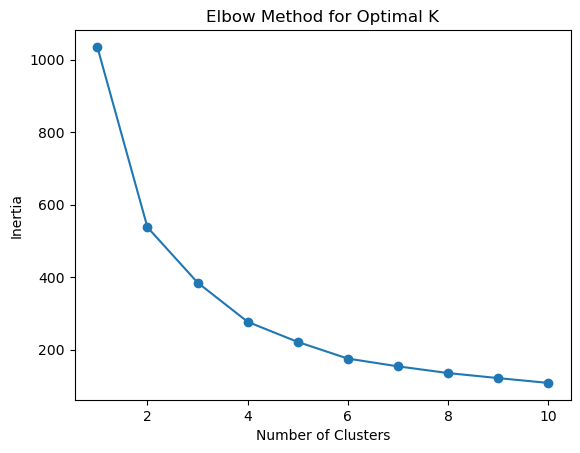

C:\Users\grace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grace\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Fall Enrollment  Wins  Win Pct  Cluster
0          38103.0    11    0.846        2
1          38392.0    14    0.933        2
2          38563.0    13    0.929        2
3          37665.0    14    0.933        2
4          37100.0    14    0.933        2


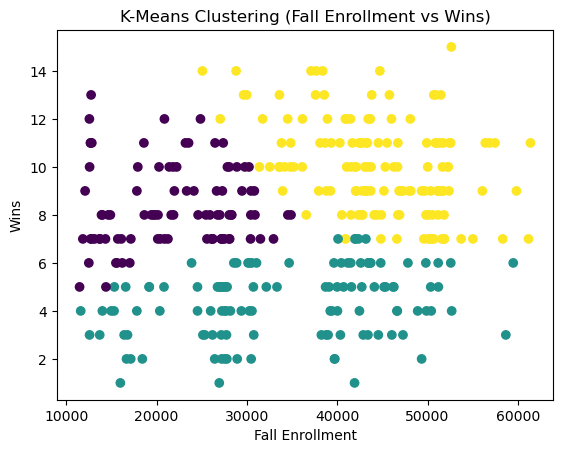

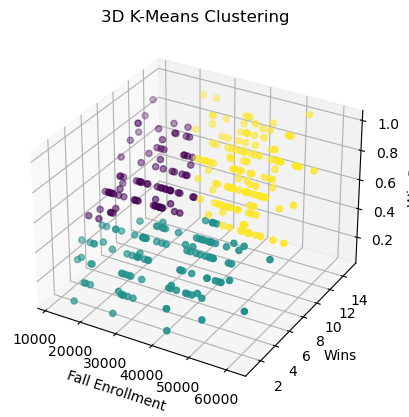

In [61]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = data[['Fall Enrollment', 'Wins', 'Win Pct']] 

# Handle missing data 
data = data.dropna()  # Drop rows with missing values

# Standardize the data for clustering 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (K) - I used the Elbow Method to find it
# Fit K-Means with different values of K
inertia = []
for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters to visualize the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the plot, choose the optimal number of clusters 
optimal_k = 3  

# Fit the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# View the resulting clusters
print(data.head())

# Visualize the clusters 
plt.scatter(data['Fall Enrollment'], data['Wins'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (Fall Enrollment vs Wins)')
plt.xlabel('Fall Enrollment')
plt.ylabel('Wins')
plt.show()

# Visualize in 3D (Fall Enrollment, Wins, Win Pct)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Fall Enrollment'], data['Wins'], data['Win Pct'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Fall Enrollment')
ax.set_ylabel('Wins')
ax.set_zlabel('Win Pct')
plt.title('3D K-Means Clustering')
plt.show()


In [62]:
print(kmeans.cluster_centers_)


[[-1.05475508  0.22913774  0.24439417]
 [-0.07615268 -1.09765444 -1.10866217]
 [ 0.75849616  0.79489655  0.79435518]]


Cluster 0:

[-1.05475508, 0.22913774, 0.24439417]
Feature 1 (Fall Enrollment): The value -1.05475508 indicates that the average enrollment for this cluster is below the mean (since the value is negative).
Feature 2 (Wins): The value 0.22913774 is slightly above the average, suggesting that this cluster has slightly above-average wins.
Feature 3 (Win Percentage): The value 0.24439417 is also slightly above the mean, indicating a slightly better-than-average win percentage for this cluster.
Interpretation: Cluster 0 could represent universities with slightly above-average football performance, but with lower-than-average enrollment.

Cluster 1:

[-0.07615268, -1.09765444, -1.10866217]
Feature 1 (Fall Enrollment): The value -0.07615268 indicates that the average enrollment is near the mean.
Feature 2 (Wins): The value -1.09765444 is well below the average, indicating that this cluster has significantly lower-than-average wins.
Feature 3 (Win Percentage): The value -1.10866217 is also well below average, suggesting this cluster has low win percentages as well.
Interpretation: Cluster 1 likely represents smaller universities or teams that perform poorly in terms of football performance (both in terms of wins and win percentage).

Cluster 2:

[0.75849616, 0.79489655, 0.79435518]
Feature 1 (Fall Enrollment): The value 0.75849616 indicates that the average enrollment in this cluster is higher than average.
Feature 2 (Wins): The value 0.79489655 is significantly above average, showing that this cluster has high win numbers.
Feature 3 (Win Percentage): The value 0.79435518 is also above average, suggesting that this cluster has high win percentages.
Interpretation: Cluster 2 likely represents larger universities with a successful football program, characterized by high enrollment and strong football performance.

Overall Interpretation:
Cluster 0: Small universities or less successful teams with slightly above-average performance.
Cluster 1: Small universities with low football performance (both in terms of wins and win percentage).
Cluster 2: Larger universities with high enrollment and successful football programs.

Mean Squared Error: 9.48
R-squared: 0.09
              Feature  Coefficient
0     Fall Enrollment     0.000034
1  US College Ranking    -0.014156


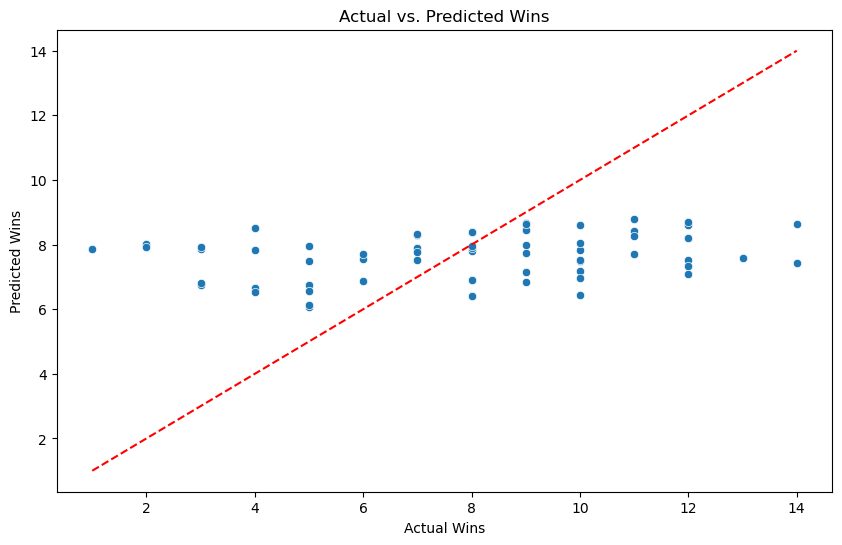

C:\Users\grace\AppData\Local\Temp\ipykernel_20596\787794306.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')


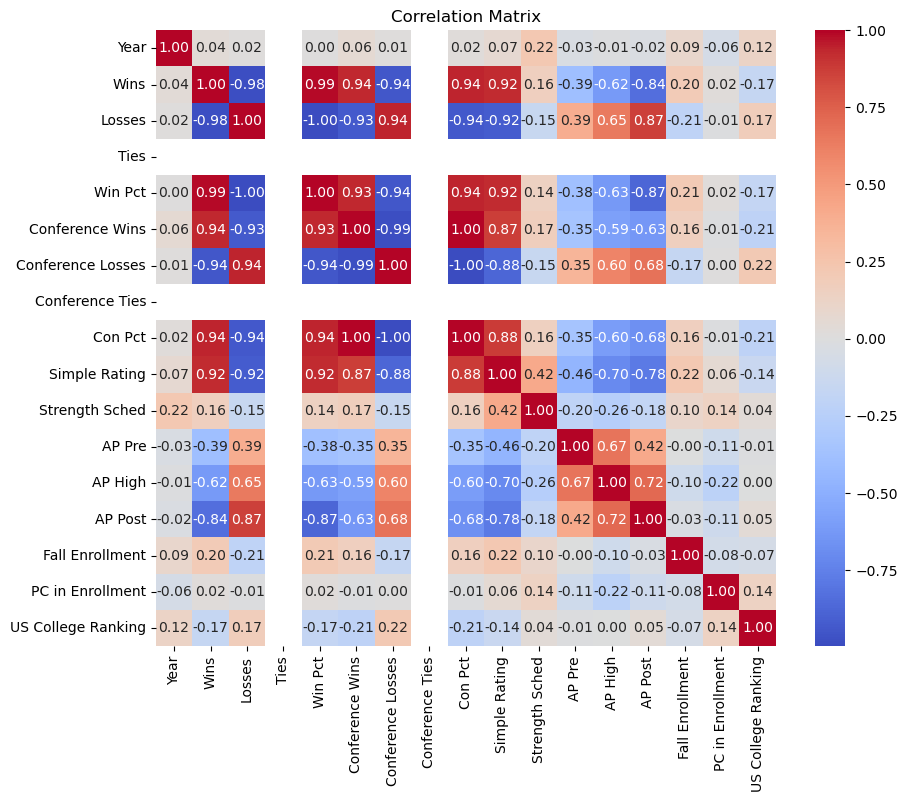

In [86]:
#does the success of the football team affect enrollment or college ranking??
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Feature selection: Enrollment and US College Ranking
features = ['Fall Enrollment', 'US College Ranking']
target = 'Wins'  

# Preprocessing
# Clean the Fall Enrollment column (remove commas and convert to numeric)
data['Fall Enrollment'] = data['Fall Enrollment'].replace({',': ''}, regex=True).astype(float)

# Handle missing values (drop rows with NaN values in selected columns)
data = data.dropna(subset=features + [target])

# Split the data into train and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Coefficients and intercept
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

# Visualize actual vs. predicted Wins
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual vs. Predicted Wins")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


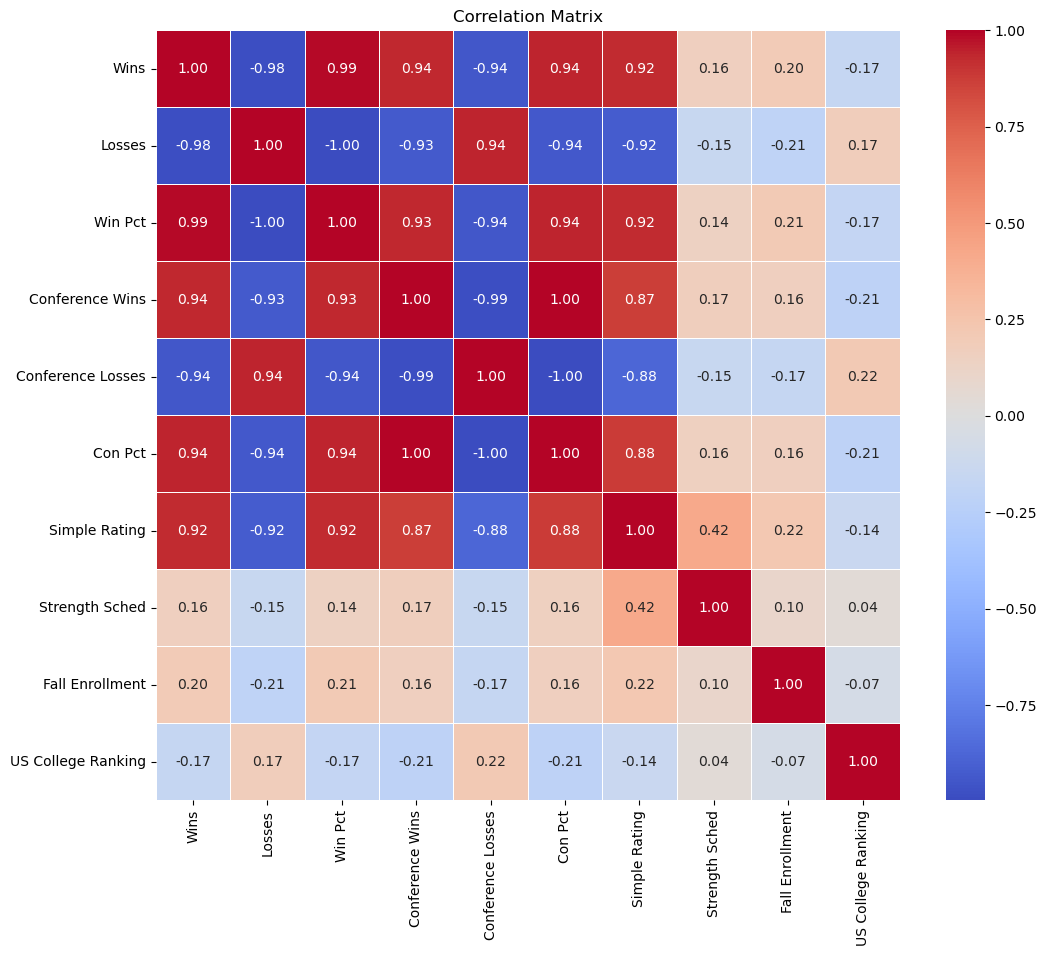

Highly correlated pairs:
Wins               Losses              -0.983562
                   Win Pct              0.991938
                   Conference Wins      0.935453
                   Conference Losses   -0.942680
                   Con Pct              0.942571
                   Simple Rating        0.923471
Losses             Wins                -0.983562
                   Win Pct             -0.995790
                   Conference Wins     -0.928503
                   Conference Losses    0.938227
                   Con Pct             -0.937240
                   Simple Rating       -0.920819
Win Pct            Wins                 0.991938
                   Losses              -0.995790
                   Conference Wins      0.933754
                   Conference Losses   -0.942439
                   Con Pct              0.941835
                   Simple Rating        0.923330
Conference Wins    Wins                 0.935453
                   Losses              -0.92

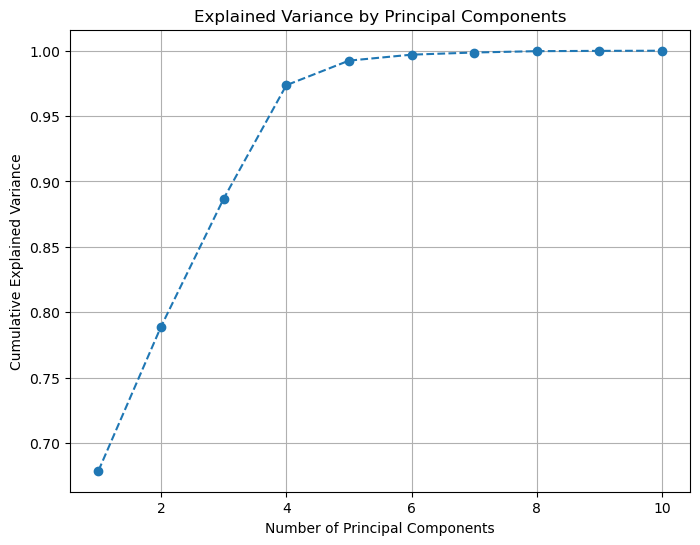

Principal Components (Loadings):
       Wins    Losses   Win Pct  Conference Wins  Conference Losses   Con Pct  \
0 -0.376751  0.375855 -0.377175        -0.373473           0.374970 -0.375272   
1  0.030007 -0.040736  0.043914         0.066347          -0.082311  0.077946   
2  0.055057 -0.045237  0.046973         0.056861          -0.051797  0.056844   
3 -0.063557  0.076677 -0.080110         0.002929           0.011872 -0.007958   
4 -0.283202  0.334444 -0.321449         0.458921          -0.399138  0.420456   
5  0.297502 -0.299865  0.271259        -0.049643           0.043550 -0.043565   
6 -0.765064 -0.621939  0.101827        -0.076505          -0.101202  0.028823   
7 -0.091522 -0.081619  0.053721         0.708964           0.689145 -0.065073   
8  0.296066 -0.503595 -0.810441         0.012734           0.030688  0.015383   
9 -0.004636  0.017261  0.014371        -0.362155           0.449985  0.815977   

   Simple Rating  Strength Sched  Fall Enrollment  US College Ranking  
0  

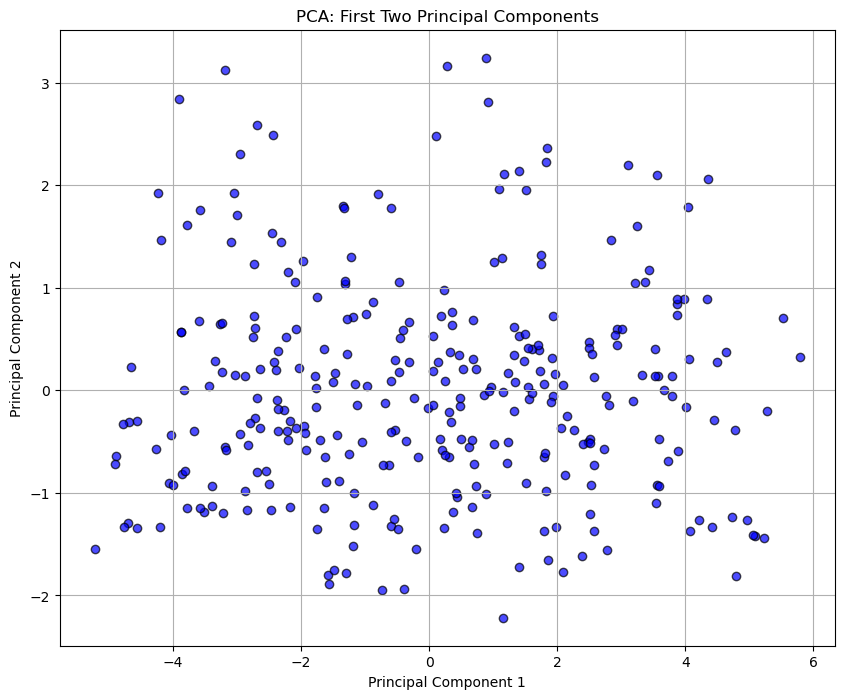

In [87]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Clean the Fall Enrollment column (remove commas and convert to numeric)
data['Fall Enrollment'] = data['Fall Enrollment'].replace({',': ''}, regex=True).astype(float)

# Select numeric columns for correlation and PCA
numeric_cols = ['Wins', 'Losses', 'Win Pct', 'Conference Wins', 'Conference Losses',
                'Con Pct', 'Simple Rating', 'Strength Sched', 'Fall Enrollment', 'US College Ranking']
data_numeric = data[numeric_cols].dropna()  # Drop rows with NaN values

#Correlation Analysis 
# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Identify high correlations (absolute value > 0.7)
high_corr = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)]
print("Highly correlated pairs:")
print(high_corr.stack())  # Display highly correlated variable pairs

# Principal Component Analysis (PCA)
# Standardize the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Print the first few principal components
pca_components = pd.DataFrame(pca.components_, columns=numeric_cols)
print("Principal Components (Loadings):")
print(pca_components)

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


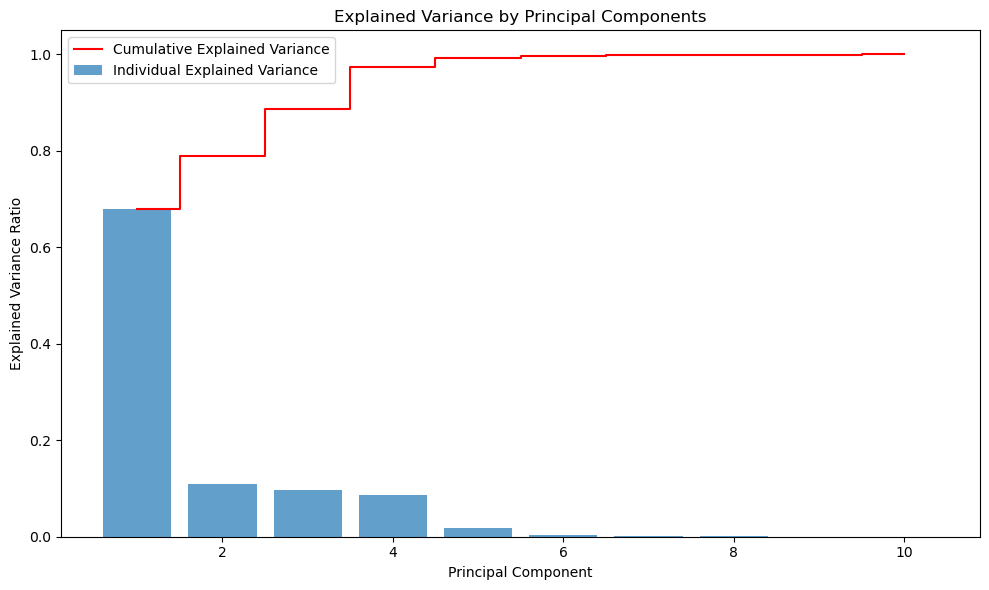

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# Fit PCA
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [97]:
#creating a new binary column, a 0 demonstrates that there was little to no change or a decrease in enrollment, 
#a 1 demonstrades if there was greater than 2% change in enrollment increase

import pandas as pd
data_new = data.copy()

# Add the 'Change Flag' column
data_new['Pos Change in Enrollment'] = data_new['PC in Enrollment'].apply(lambda x: 1 if x > 2 else 0)

# Display the first few rows of the new DataFrame
display(data_new.head())


,Team,Year,Conference,Wins,Losses,Ties,Win Pct,Conference Wins,Conference Losses,Conference Ties,Con Pct,Simple Rating,Strength Sched,AP Pre,AP High,AP Post,Fall Enrollment,PC in Enrollment,US College Ranking,Pos Change in Enrollment
0,Alabama Crimson Tide,2019,SEC,11,2,0,0.846,6,2,0,0.750,21.11,2.81,2.0,1.0,8.0,38103.0,-0.75,129.0,0
1,Alabama Crimson Tide,2018,SEC,14,1,0,0.933,8,0,0,1.000,25.29,6.63,1.0,1.0,2.0,38392.0,-0.44,110.0,0
2,Alabama Crimson Tide,2017,SEC,13,1,0,0.929,7,1,0,0.875,21.25,5.46,1.0,1.0,1.0,38563.0,2.38,103.0,1
3,Alabama Crimson Tide,2016,SEC,14,1,0,0.933,8,0,0,1.000,25.62,7.29,1.0,1.0,2.0,37665.0,1.52,96.0,0
4,Alabama Crimson Tide,2015,SEC,14,1,0,0.933,7,1,0,0.875,23.72,7.46,3.0,1.0,1.0,37100.0,2.61,88.0,1


Correlation Coefficient: 0.1977
P-value: 0.0005

Pandas Correlation Matrix:
                    Wins  Fall Enrollment
Wins             1.00000          0.19766
Fall Enrollment  0.19766          1.00000


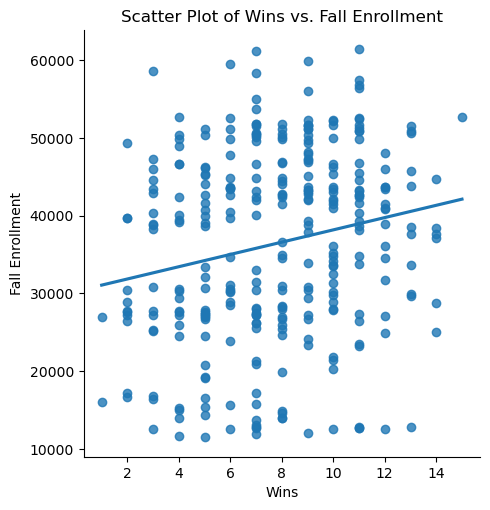

In [116]:
import pandas as pd
from scipy.stats import pearsonr

# Drop rows with missing data in 'Wins' or 'Fall Enrollment'
df_clean = data_new[['Wins', 'Fall Enrollment']].dropna()

# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(df_clean['Wins'], df_clean['Fall Enrollment'])

# Print results
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

print("\nPandas Correlation Matrix:")
print(df_clean.corr())

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
sns.lmplot(x='Wins', y='Fall Enrollment', data=df_clean, ci=None)
plt.title("Scatter Plot of Wins vs. Fall Enrollment")
plt.xlabel("Wins")
plt.ylabel("Fall Enrollment")
plt.show()
